In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nassimsbai/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
data=pd.read_csv('reviews.csv')

In [16]:
data.head(5)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


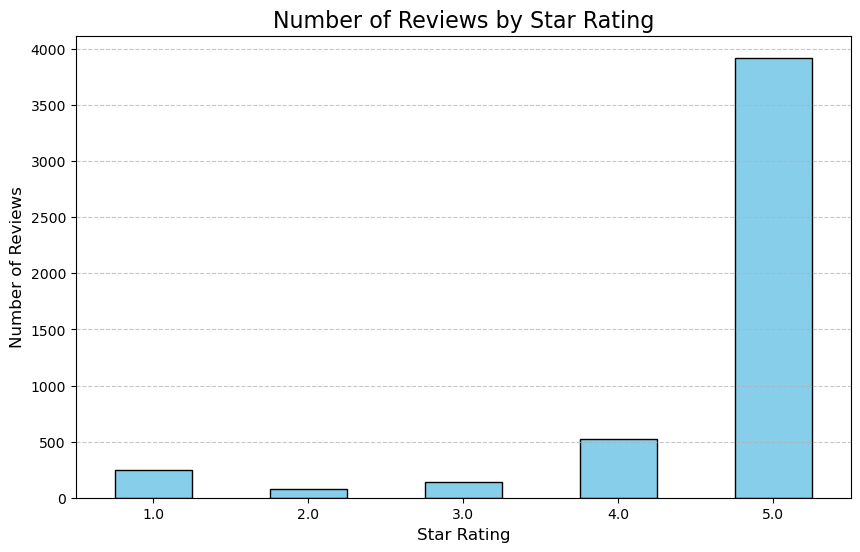

In [17]:
graph = data['overall'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))

graph.set_title('Number of Reviews by Star Rating', fontsize=16)
graph.set_xlabel('Star Rating', fontsize=12)
graph.set_ylabel('Number of Reviews', fontsize=12)
graph.tick_params(axis='x', labelsize=10, rotation=0)
graph.tick_params(axis='y', labelsize=10)
graph.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [18]:
#The dataset appears to be skewed towards positive reviews, indicating a potential bias in the data.

In [20]:
analyzer=SentimentIntensityAnalyzer()

In [24]:
data['reviewText'][0:5]

0                                           No issues.
1    Purchased this for my device, it worked as adv...
2    it works as expected. I should have sprung for...
3    This think has worked out great.Had a diff. br...
4    Bought it with Retail Packaging, arrived legit...
Name: reviewText, dtype: object

In [25]:
sentiment_scores = [analyzer.polarity_scores(text) for text in data['reviewText'].head()]
for i, score in enumerate(sentiment_scores, start=1):
    print(f"Sentiment score for review {i}: {score}")

Sentiment score for review 1: {'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296}
Sentiment score for review 2: {'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'compound': -0.296}
Sentiment score for review 3: {'neg': 0.077, 'neu': 0.923, 'pos': 0.0, 'compound': -0.3089}
Sentiment score for review 4: {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.7081}
Sentiment score for review 5: {'neg': 0.038, 'neu': 0.835, 'pos': 0.127, 'compound': 0.7087}


In [27]:
from tqdm.notebook import tqdm

In [28]:
#We will run the sentiment analyzer on the first 100 rows of our dataset

In [33]:
scores = [analyzer.polarity_scores(text) for text in data['reviewText'].head(100)]
scores_df = pd.DataFrame(scores)
scores_df['Review Number'] = range(1, len(scores_df) + 1)
scores_df.set_index('Review Number', inplace=True) 

In [34]:
scores_df.head()

,neg,neu,pos,compound
Review Number,,,,
1,0.688,0.312,0.000,-0.2960
2,0.075,0.925,0.000,-0.2960
3,0.077,0.923,0.000,-0.3089
4,0.000,0.909,0.091,0.7081
5,0.038,0.835,0.127,0.7087


In [38]:
new_data=data[['overall','reviewText']]

In [39]:
new_data.head()

,overall,reviewText
0,4.0,No issues.
1,5.0,"Purchased this for my device, it worked as adv..."
2,4.0,it works as expected. I should have sprung for...
3,5.0,This think has worked out great.Had a diff. br...
4,5.0,"Bought it with Retail Packaging, arrived legit..."


In [40]:
#The higher the rating the more likely it is that the text is positive, this component will be crucial for our analysis

In [42]:
new_data.index=range(1, len(data) + 1)

In [45]:
df=new_data[:100]

In [47]:
combined_df = pd.concat([df, scores_df], axis=1)

In [48]:
combined_df

,overall,reviewText,neg,neu,pos,compound
1,4.0,No issues.,0.688,0.312,0.000,-0.2960
2,5.0,"Purchased this for my device, it worked as adv...",0.075,0.925,0.000,-0.2960
3,4.0,it works as expected. I should have sprung for...,0.077,0.923,0.000,-0.3089
4,5.0,This think has worked out great.Had a diff. br...,0.000,0.909,0.091,0.7081
5,5.0,"Bought it with Retail Packaging, arrived legit...",0.038,0.835,0.127,0.7087
...,...,...,...,...,...,...
96,5.0,I bought the 64GB MicroSD card at Best Buy bec...,0.008,0.874,0.119,0.9432
97,4.0,I got this because I just couldn't pass up the...,0.000,0.803,0.197,0.9577
98,5.0,You get a lot of storage at a small price. the...,0.000,0.756,0.244,0.8655
99,5.0,The Ultra micro SDHC was fine once I got it wo...,0.032,0.869,0.099,0.6476


In [49]:
#Let's see the correlation between the overall rating and the probability that the review is positive

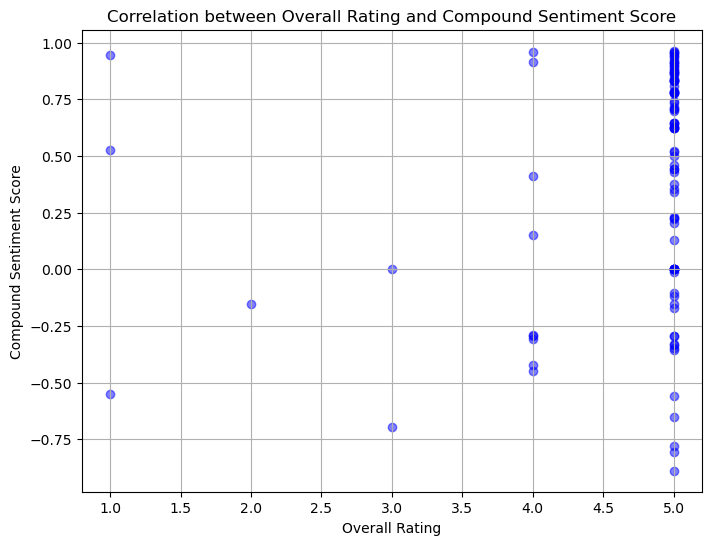

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['overall'], combined_df['compound'], color='blue', alpha=0.5)
plt.title('Correlation between Overall Rating and Compound Sentiment Score')
plt.xlabel('Overall Rating')
plt.ylabel('Compound Sentiment Score')
plt.grid(True)
plt.show()


In [53]:
#Let's now see the correlation between reviews that have 5 stars and the coumpound score

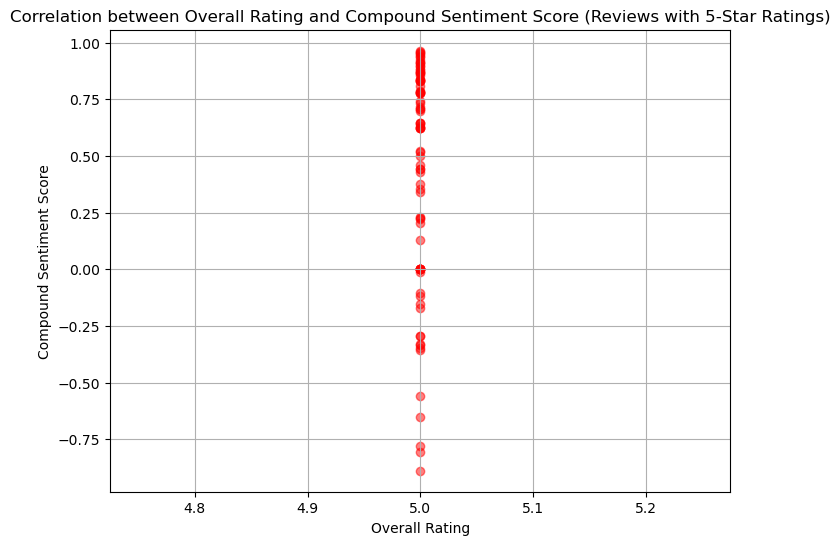

In [56]:
five_stars = df[df['overall'] == 5.0].copy() 
five_stars.loc[:, 'compound'] = five_stars['reviewText'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
plt.figure(figsize=(8, 6))
plt.scatter(five_stars['overall'], five_stars['compound'], color='red', marker='o', alpha=0.5)
plt.title('Correlation between Overall Rating and Compound Sentiment Score (Reviews with 5-Star Ratings)')
plt.xlabel('Overall Rating')
plt.ylabel('Compound Sentiment Score')
plt.grid(True)
plt.show()

In [58]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
print(sentiment_analysis("I love this!"))

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9988656044006348}]


In [60]:
df.head() 

,overall,reviewText
1,4.0,No issues.
2,5.0,"Purchased this for my device, it worked as adv..."
3,4.0,it works as expected. I should have sprung for...
4,5.0,This think has worked out great.Had a diff. br...
5,5.0,"Bought it with Retail Packaging, arrived legit..."


In [64]:
sentiments = []
for review in df['reviewText']:
    review_segments = [review[i:i+512] for i in range(0, len(review), 512)]
    segment_scores = []
    for segment in review_segments:
        result = sentiment_analysis(segment)
        segment_scores.append(result[0]['score'])
    score = sum(segment_scores) / len(segment_scores)  
    sentiment = "POSITIVE" if score >= 0.5 else "NEGATIVE"
    sentiments.append((sentiment, score))

In [65]:
df_copy = df.copy()

In [66]:
df_copy.loc[:, 'sentiment'] = [sentiment[0] for sentiment in sentiments]
df_copy.loc[:, 'sentiment_score'] = [sentiment[1] for sentiment in sentiments]

In [67]:
df_copy

,overall,reviewText,sentiment,sentiment_score
1,4.0,No issues.,POSITIVE,0.998544
2,5.0,"Purchased this for my device, it worked as adv...",POSITIVE,0.998802
3,4.0,it works as expected. I should have sprung for...,POSITIVE,0.997948
4,5.0,This think has worked out great.Had a diff. br...,POSITIVE,0.998865
5,5.0,"Bought it with Retail Packaging, arrived legit...",POSITIVE,0.998824
...,...,...,...,...
96,5.0,I bought the 64GB MicroSD card at Best Buy bec...,POSITIVE,0.998708
97,4.0,I got this because I just couldn't pass up the...,POSITIVE,0.998883
98,5.0,You get a lot of storage at a small price. the...,POSITIVE,0.998924
99,5.0,The Ultra micro SDHC was fine once I got it wo...,POSITIVE,0.998627


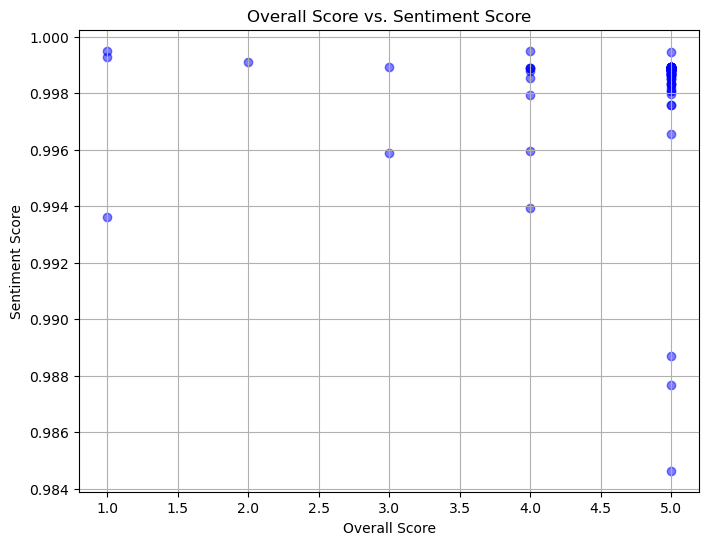

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(df_copy['overall'], df_copy['sentiment_score'], color='blue', alpha=0.5)
plt.title('Overall Score vs. Sentiment Score')
plt.xlabel('Overall Score')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

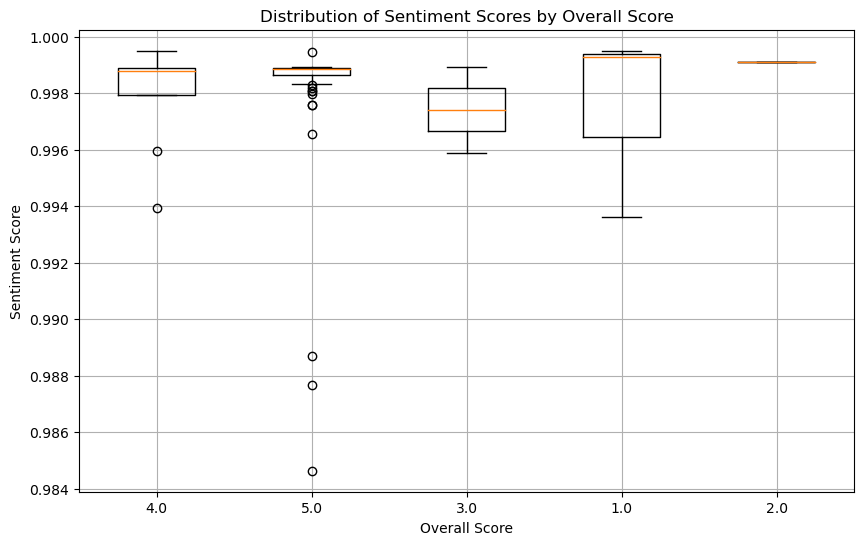

In [73]:
plt.figure(figsize=(10, 6))
plt.boxplot([df_copy[df_copy['overall'] == score]['sentiment_score'] for score in df_copy['overall'].unique()],
            labels=df_copy['overall'].unique())
plt.title('Distribution of Sentiment Scores by Overall Score')
plt.xlabel('Overall Score')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()